# Covid-19_Outcome-Prediction (Phase 2)

## Import the Libraries

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score 
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import warnings 
warnings.filterwarnings(action= 'ignore')
%matplotlib inline

In [2]:
# read the dataset
df = pd.read_csv('data.csv',index_col=[0])
df.head(6)

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0
5,23,8,0,44.0,0,1,14,31,19,12,3,1,0,0


In [3]:
# get the dimensions of the dataset
df.shape

(863, 14)

In [4]:
# find the data types of the attributes
df.dtypes

location          int64
country           int64
gender            int64
age             float64
vis_wuhan         int64
from_wuhan        int64
symptom1          int64
symptom2          int64
symptom3          int64
symptom4          int64
symptom5          int64
symptom6          int64
diff_sym_hos      int64
result            int64
dtype: object

In [5]:
# concise summary of the data
df.describe()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
count,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.00000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000
mean,76.645423,16.995365,0.849363,49.400000,0.181924,0.107764,12.13905,28.002317,18.298957,11.840093,2.993048,0.998841,0.995365,0.125145
std,39.200264,7.809951,0.726062,15.079203,0.386005,0.310261,3.99787,7.473231,2.864064,1.183771,0.127251,0.034040,2.358767,0.331075
min,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,0.000000
25%,45.000000,11.000000,0.000000,40.000000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,0.000000,0.000000
50%,87.000000,18.000000,1.000000,49.400000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,0.000000,0.000000
75%,110.000000,24.000000,1.000000,57.000000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,1.000000,0.000000
max,138.000000,33.000000,2.000000,96.000000,1.000000,1.000000,24.00000,31.000000,19.000000,12.000000,3.000000,1.000000,15.000000,1.000000


In [6]:
# find if missing values is present
df.isnull().sum()

location        0
country         0
gender          0
age             0
vis_wuhan       0
from_wuhan      0
symptom1        0
symptom2        0
symptom3        0
symptom4        0
symptom5        0
symptom6        0
diff_sym_hos    0
result          0
dtype: int64

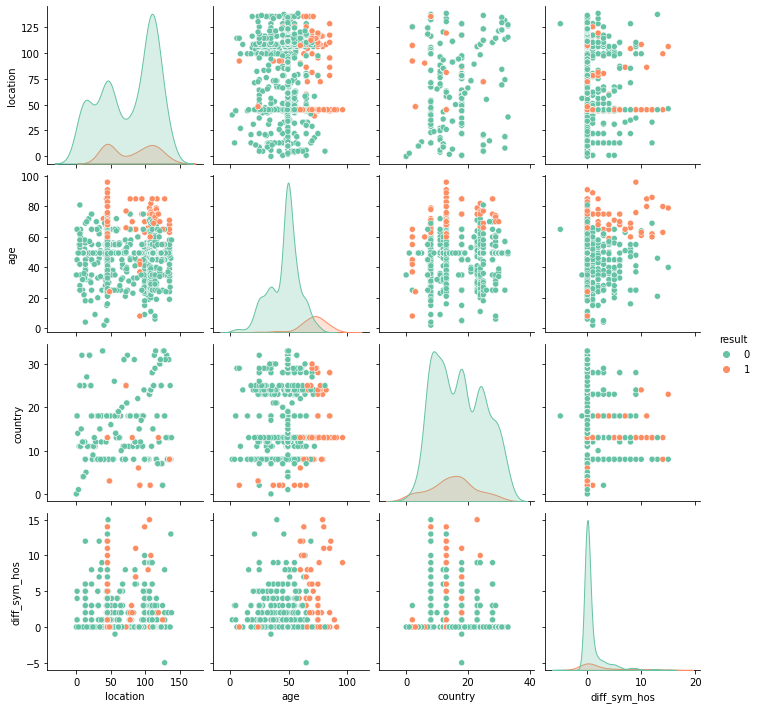

In [7]:
features = df.drop(columns=['result'])
value = df['result']
# Generate pair plot
sns.pairplot(df.dropna(), vars=['location', 'age', 'country', 'diff_sym_hos'], hue='result', palette="Set2");

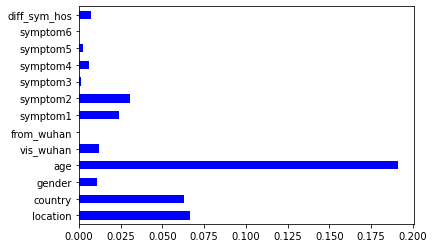

In [8]:
features = df.drop(columns=['result'])
value = df['result']
importances = mutual_info_classif(features , value)
feat_importances = pd.Series(importances, df.columns[0:len(df.columns)-1])
feat_importances.plot(kind='barh', color = 'blue')
plt.show()

<AxesSubplot:xlabel='result', ylabel='count'>

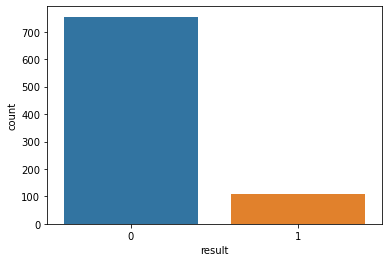

In [9]:
# get the distribution of the target variable
sns.countplot(x="result", data = df)

#### The result show that te number of people that recovered is much greater than the people that died

<AxesSubplot:xlabel='age', ylabel='Count'>

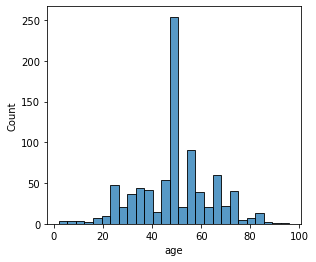

In [10]:
#Plot count of people infected with the age
f = plt.figure(figsize=(10,4))
f.add_subplot(1,2,1)
sns.histplot(df['age'])

#### People between the age fo 40 to 60 is the most people infected with corona virus

In [11]:
#one hot encoding data frame
one_hot_encoded_data = pd.get_dummies(df, columns = ['location', 'country', 'gender', 
                                                     'symptom1','symptom2','symptom3','symptom4',
                                                     'symptom5'])
new_df = one_hot_encoded_data

# Modelling with Decision Trees

In [12]:
#Import libraries
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

In [13]:
#Split Data into training and testing set
xdat = new_df.drop(columns=['result'])
ydat = new_df['result']
xtr, xts, ytr, yts = train_test_split(xdat, ydat, test_size=0.3, random_state = 0, stratify=ydat,shuffle = True)
print('Training set shape: ', xtr.shape, ytr.shape)
print('Testing set shape: ', xts.shape, yts.shape)

Training set shape:  (604, 275) (604,)
Testing set shape:  (259, 275) (259,)


In [14]:
#hyperparameters Tuning
param = {
                "criterion":['gini', 'entropy'],
                "max_depth":range(1,10),
                "min_samples_split":range (1,10),
                "min_samples_leaf":range(1,5)
}
grid = GridSearchCV(DecisionTreeClassifier(),param_grid=param, cv=10, verbose=1, n_jobs=-1)
grid.fit(xtr,ytr)
grid.best_estimator_

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3,
                       min_samples_split=7)

In [47]:
# Initialize classifier:
DT = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3,min_samples_split=7, random_state=42)
# fit the model
DT.fit(xtr, ytr)
# Predict data with classifier: 
pred_y = DT.predict(xts)
#Print accuracy score
print('accuracy score:',accuracy_score(yts, pred_y))

accuracy score: 0.9382239382239382


In [48]:
#Performance Classifiers
yts_score=DT.predict_proba(xts)
print('Precision: %.3f' % precision_score(yts, pred_y))
print('Recall: %.3f' % recall_score(yts, pred_y))
print('F1 Score: %.3f' % f1_score(yts, pred_y))
print('roc_auc_score: ',roc_auc_score(yts, yts_score[:,1]))

Precision: 0.833
Recall: 0.625
F1 Score: 0.714
roc_auc_score:  0.9103799559471366


In [49]:
print(classification_report(yts, pred_y))
print('roc_auc_score: %.3f '% roc_auc_score(yts, yts_score[:,1]))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       227
           1       0.83      0.62      0.71        32

    accuracy                           0.94       259
   macro avg       0.89      0.80      0.84       259
weighted avg       0.93      0.94      0.93       259

roc_auc_score: 0.910 


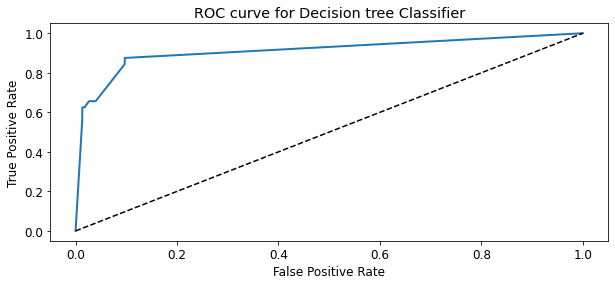

In [50]:
# plot ROC Curve
fpr, tpr, thresholds = roc_curve(yts, yts_score[:,1])
plt.figure(figsize=(10,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Decision tree Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

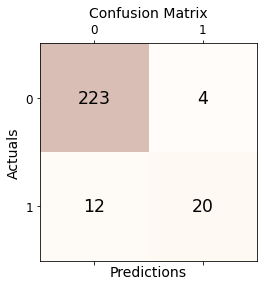

In [51]:
#Plot Confusion Matrix
cm = confusion_matrix(yts, pred_y)
fig, ax = plt.subplots(figsize=(10, 4))
ax.matshow(cm, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='x-large')
plt.xlabel('Predictions', fontsize=14)
plt.ylabel('Actuals', fontsize=14)
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [52]:
#Inntialize TP, TN, FP, AND FN
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [53]:
#Calculating Accuracy of the model using the confusion matrix
classify_accuracy = (TP + TN) / float(TP + TN + FP + FN)
classify_error = (FP + FN) / float(TP + TN + FP + FN)
precision = TP / float(TP + FP)
recall = TP / float(TP + FN)
true_positive_rate = TP / float(TP + FN)
false_positive_rate = FP / float(FP + TN)
specificity = TN / (TN + FP)
# print classification accuracy, 
print('Classification accuracy : {0:0.4f}'.format(classify_accuracy))
print('Classification error : {0:0.4f}'.format(classify_error))
print('Precision : {0:0.4f}'.format(precision))
print('Recall or Sensitivity : {0:0.4f}'.format(recall))
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))
print('Specificity : {0:0.4f}'.format(specificity))

Classification accuracy : 0.9382
Classification error : 0.0618
Precision : 0.9824
Recall or Sensitivity : 0.9489
True Positive Rate : 0.9489
False Positive Rate : 0.1667
Specificity : 0.8333


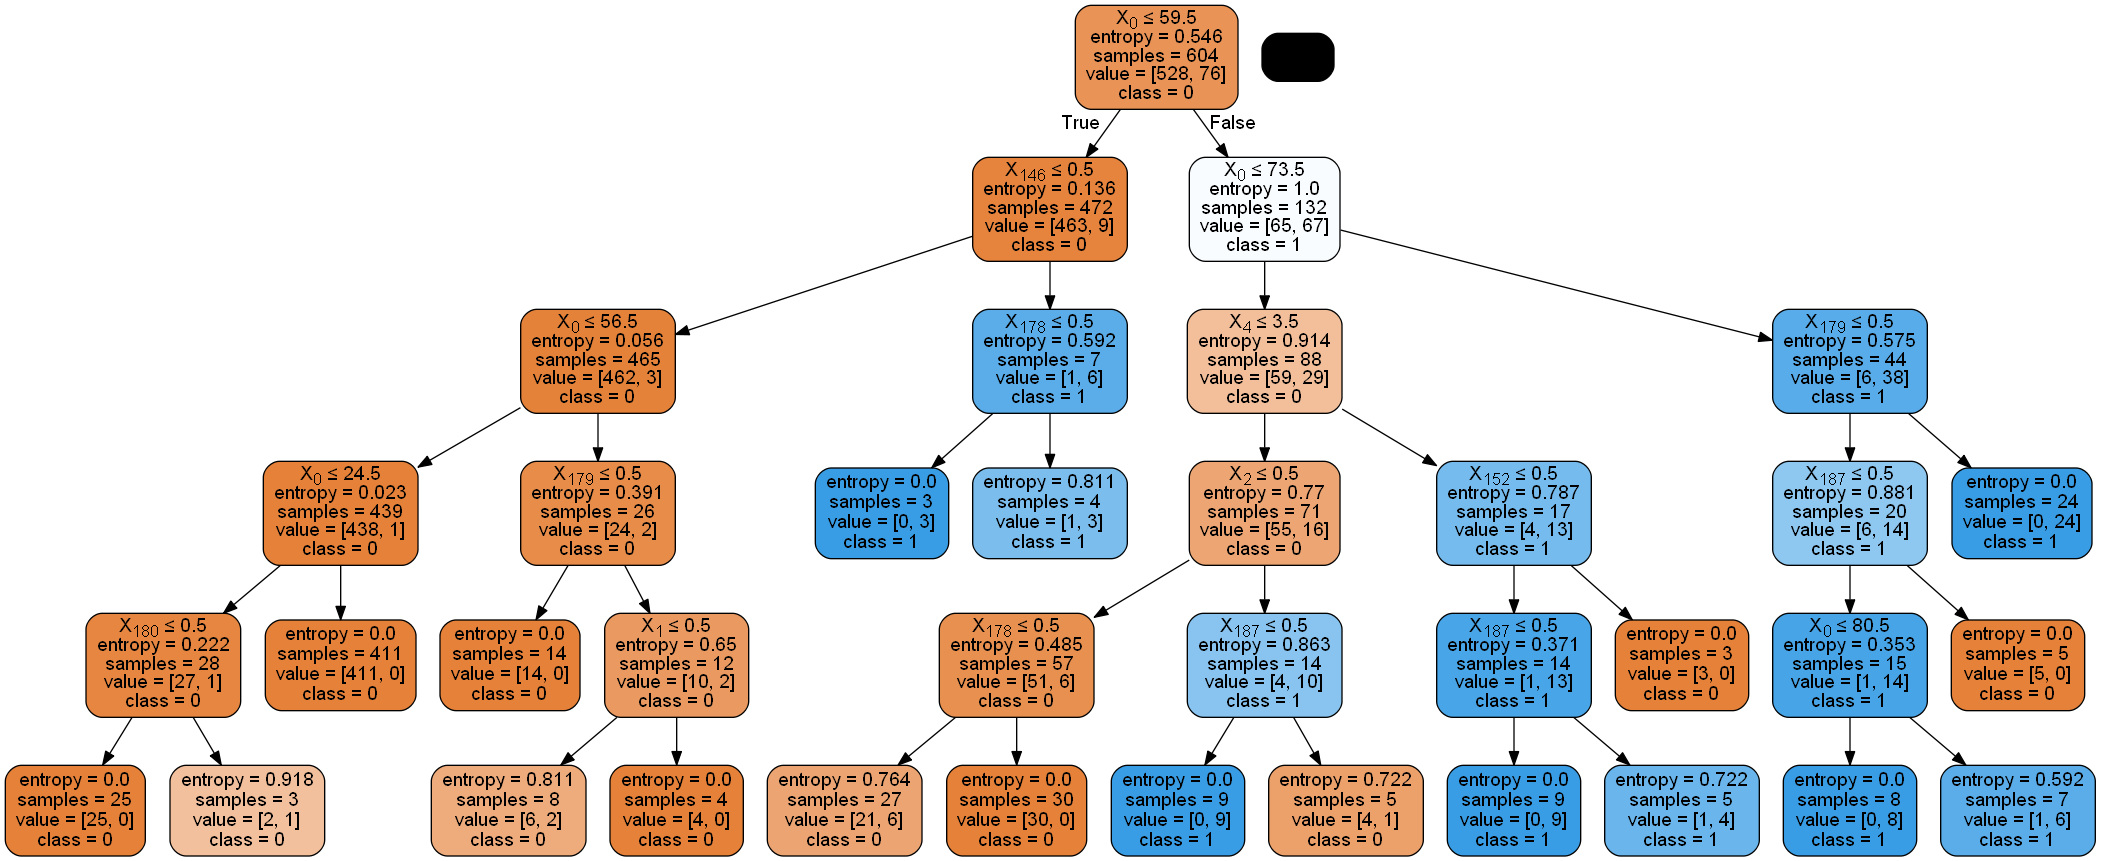

In [54]:
dot_data = StringIO()
export_graphviz(DT, out_file = dot_data, rounded = True, filled = True, special_characters = True,class_names = ["0","1"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("img.png")
Image(graph.create_png())

# Modelling with Support Vector Machine

In [30]:
#Import libraries
from sklearn import svm
from sklearn.svm import SVC

In [31]:
#Split Data into training and testing set
xdat2 = new_df.drop(columns=['result'])
ydat2 = new_df['result']
xtr2,xts2,ytr2,yts2 = train_test_split(xdat2, ydat2, test_size=0.3, random_state = 0)
print('Training set shape: ', xtr2.shape, ytr2.shape)
print('Testing set shape: ', xts2.shape, yts2.shape)

Training set shape:  (604, 275) (604,)
Testing set shape:  (259, 275) (259,)


In [32]:
#hyperparameters Tuning
param=[
        {"kernel" : ['linear','rbf'],
         'degree' : range (0,20),
         'C' : [0.1,1,10,100,1000],
         'probability' : [True]
        }
]
clf = GridSearchCV(svm.SVC(), param_grid = param, cv = 10,verbose = 1 ,n_jobs = -1)
clf.fit(xtr2 , ytr2)
clf.best_estimator_

Fitting 10 folds for each of 200 candidates, totalling 2000 fits


SVC(C=100, degree=0, kernel='linear', probability=True)

In [34]:
# Initialize classifier:
svc = svm.SVC(C=100, degree=0, kernel='linear', probability=True)
# fit the model
svc.fit(xtr2,ytr2)
# Predict data with classifier: 
pred_y2 = svc.predict (xts2)
#Print Accuracy of the model
accuracy = svc.score(xts2, yts2)
print ("Accuracy is {}".format(accuracy))

Accuracy is 0.972972972972973


 ### Comparing the performance of all classifiers using different metrics:

In [41]:
#Performance Classifiers
yts_score2=svc.predict_proba(xts2)
print('Precision: %.3f' % precision_score(yts2, pred_y2))
print('Recall: %.3f' % recall_score(yts2, pred_y2))
print('F1 Score: %.3f' % f1_score(yts2, pred_y2))
print('roc_auc_score: %.3f' % roc_auc_score(yts2, yts_score2[:,1]))

Precision: 0.941
Recall: 0.865
F1 Score: 0.901
roc_auc_score: 0.993


In [42]:
#Classification Report
print(classification_report(yts2, pred_y2))
print('roc_auc_score: %.3f'% roc_auc_score(yts2, yts_score2[:,1]))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       222
           1       0.94      0.86      0.90        37

    accuracy                           0.97       259
   macro avg       0.96      0.93      0.94       259
weighted avg       0.97      0.97      0.97       259

roc_auc_score: 0.993


### plot ROC Curve

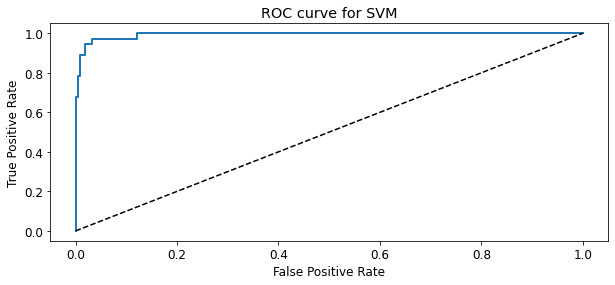

In [43]:
#ROC Curve
fpr, tpr, thresholds = roc_curve(yts2, yts_score2[:,1])
plt.figure(figsize=(10,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for SVM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### Confusion Matrix

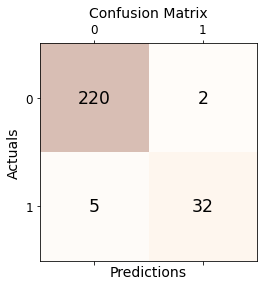

In [44]:
#Plot Confusion Matrix
cm2 = confusion_matrix(yts2, pred_y2)
fig, ax = plt.subplots(figsize=(10, 4))
ax.matshow(cm2, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(cm2.shape[0]):
    for j in range(cm2.shape[1]):
        ax.text(x=j, y=i,s=cm2[i, j], va='center', ha='center', size='x-large')
plt.xlabel('Predictions', fontsize=14)
plt.ylabel('Actuals', fontsize=14)
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [45]:
#Inntialize TP, TN, FP, AND FN
TP = cm2[0,0]
TN = cm2[1,1]
FP = cm2[0,1]
FN = cm2[1,0]

In [46]:
#Calculating Accuracy of the model using the confusion matrix
classify_accuracy = (TP + TN) / float(TP + TN + FP + FN)
classify_error = (FP + FN) / float(TP + TN + FP + FN)
precision = TP / float(TP + FP)
recall = TP / float(TP + FN)
true_positive_rate = TP / float(TP + FN)
false_positive_rate = FP / float(FP + TN)
specificity = TN / (TN + FP)
# print classification accuracy, 
print('Classification accuracy : {0:0.4f}'.format(classify_accuracy))
print('Classification error : {0:0.4f}'.format(classify_error))
print('Precision : {0:0.4f}'.format(precision))
print('Recall or Sensitivity : {0:0.4f}'.format(recall))
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))
print('Specificity : {0:0.4f}'.format(specificity))

Classification accuracy : 0.9730
Classification error : 0.0270
Precision : 0.9910
Recall or Sensitivity : 0.9778
True Positive Rate : 0.9778
False Positive Rate : 0.0588
Specificity : 0.9412
